In [1]:
# !pip install contractions
# !pip install --upgrade pyLDAvis joblib

In [2]:
#Import Libraries

#for reading and data-manipulation
import os
import numpy as np
import pandas as pd
                                                                             

In [3]:
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis




In [4]:
#for any hypothesis testing
# import scipy.stats as stats



In [5]:
#for data preprocessing
import time
from contractions import contractions_dict
import re
from collections import Counter
from wordcloud import STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# for ML model Implementation
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

In [7]:
#for future work
import joblib

# DATASET LOADING

In [8]:
df = pd.read_csv('GlobalNewsDataset/data.csv', encoding='ISO-8859-1')
df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOããã¯ã³ã©ã³ã¯ä¸ã®å¤§äººã£ã...,[æ ªå¼ä¼ç¤¾Ainer]\nRANDEBOOï¼ã©ã³ããã...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal Â UN Secretary-General Antoni...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [9]:
categories = df.category.value_counts()

In [10]:
type(categories)

pandas.core.series.Series

In [11]:
categories.iloc[:15]

category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
Canada         2324
News           1852
COVID          1821
Education      1771
Food           1613
Jobs           1562
Weather        1496
Travel         1451
Cars           1289
Science        1261
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [13]:
# To filter the DataFrame to include only records where the category column falls under the specified categories 
# (Stock, Health, Finance, Technology, Real estate), you can use the following code:
# Define the list of categories you want to keep
categories_to_keep = ['Stock', 'Health', 'Finance', 'Technology', 'Real estate']

# Filter the DataFrame to include only rows where the category is in the specified list
df_filtered = df[df['category'].isin(categories_to_keep)]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13718 entries, 1280 to 104592
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    13718 non-null  int64 
 1   source_id     2884 non-null   object
 2   source_name   13718 non-null  object
 3   author        13349 non-null  object
 4   title         13718 non-null  object
 5   description   13588 non-null  object
 6   url           13718 non-null  object
 7   url_to_image  13220 non-null  object
 8   published_at  13718 non-null  object
 9   content       13718 non-null  object
 10  category      13718 non-null  object
 11  full_content  11517 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


In [14]:
df_filtered.category.value_counts()

category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
Name: count, dtype: int64

In [15]:
df = df_filtered.rename(columns={'article_id': 'unique_identifier', 'content': 'brief_review'})

In [16]:
df = df[['unique_identifier', 'brief_review', 'category']].dropna()

In [17]:
df.head()

,unique_identifier,brief_review,category
1280,93416,WeWork has seen a dramatic fall from grace sin...,Real estate
1289,93553,Orlando real estate agent and content creator ...,Real estate
1446,93427,"Using survey data, responses from community bo...",Real estate
2098,93467,Were excited to announce our participation in ...,Real estate
2107,93468,GalÃ¡pagos Giant Tortoises Are Ecosystem Engin...,Real estate


In [18]:
# Sample 400 records from each category
df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(400, random_state=42))

# Display the sampled data info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 54879 to 104310
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  2000 non-null   int64 
 1   brief_review       2000 non-null   object
 2   category           2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/624786262.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(400, random_state=42))


In [19]:
df.category.value_counts()

category
Finance        400
Health         400
Real estate    400
Stock          400
Technology     400
Name: count, dtype: int64

In [20]:
# # for testing and computational reasons, I will be working with only 1000 datasets for now.
# df = df.iloc[:2000]
# df.info()

# Knowing your data 

In [21]:
df.describe()

,unique_identifier
count,2000.00000
mean,276332.24850
std,190779.10791
min,19925.00000
25%,125232.00000
50%,209443.50000
75%,395825.25000
max,763630.00000


In [22]:
# Handling missing values
df.isnull().sum()

unique_identifier    0
brief_review         0
category             0
dtype: int64

In [23]:
#handling duplicate values 
len(df[df.duplicated(subset=['brief_review'])])

81

In [24]:
len(df[df.duplicated(subset=['unique_identifier'])])


30

In [25]:
# Drop duplicate 
df_cleaned = df.drop_duplicates(subset = ["brief_review", "unique_identifier"])
print(df_cleaned.head())

       unique_identifier                                       brief_review  \
54879             123984  The benchmark Nifty 50 started the session on ...   
11877             112963  Reported Standalone quarterly numbers for Dabu...   
75755             302235  Andra AP fonden raised its stake in CarMax, In...   
83139             367656  Shares of Manappuram Finance jumped 10% on Wed...   
54935             124065  HBS faculty comprises more than 300 scholars a...   

      category  
54879  Finance  
11877  Finance  
75755  Finance  
83139  Finance  
54935  Finance  


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1970 entries, 54879 to 104310
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  1970 non-null   int64 
 1   brief_review       1970 non-null   object
 2   category           1970 non-null   object
dtypes: int64(1), object(2)
memory usage: 61.6+ KB


/Users/binitkc/pytorch_Tutorial/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/binitkc/pytorch_Tutorial/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/binitkc/pytorch_Tutorial/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


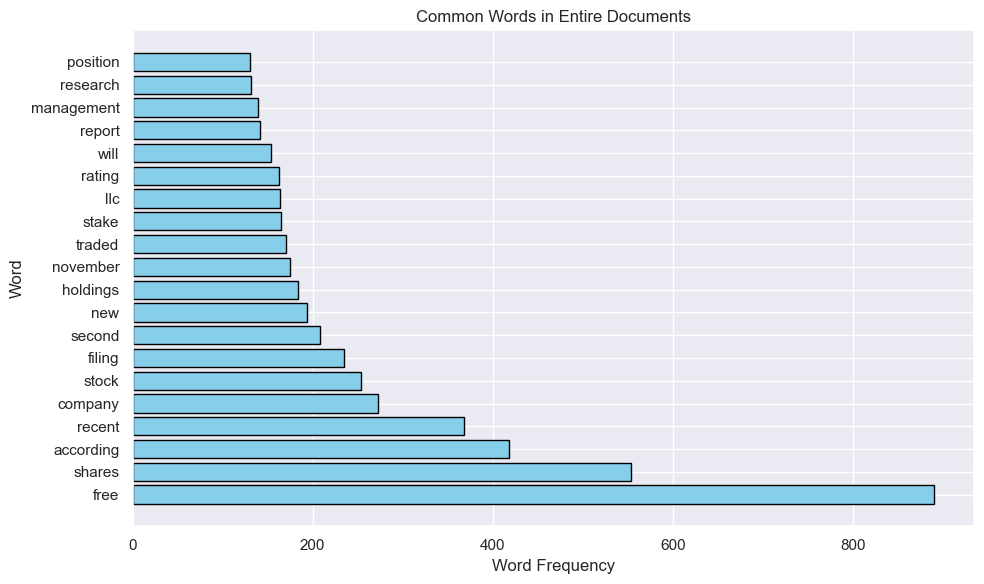

In [27]:
#visualization for common words in entire documents
# Chart - 4 visualization code

# Combine all article content across categories
combined_content = ' '.join(df_cleaned['brief_review'])

#convert the whole content in lowercase
combined_content = combined_content.lower()

# Tokenize the combined content
tokens = combined_content.split()

# Filter out stopwords and non-alphanumeric words
filtered_tokens = [word for word in tokens if word.isalpha() and word not in STOPWORDS]

# Create a Counter to count word frequencies
word_counter = Counter(filtered_tokens)

# Choose the number of most common words to visualize
num_common_words = 20
common_words = word_counter.most_common(num_common_words)

# Create a bar plot for common words
plt.figure(figsize=(10, 6))
plt.barh([word[0] for word in common_words], [count[1] for count in common_words], color='skyblue', edgecolor='black')
plt.title('Common Words in Entire Documents')
plt.xlabel('Word Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Display the plot
plt.show()

In [28]:
common_words

[('free', 890),
 ('shares', 553),
 ('according', 418),
 ('recent', 368),
 ('company', 272),
 ('stock', 254),
 ('filing', 235),
 ('second', 208),
 ('new', 194),
 ('holdings', 184),
 ('november', 175),
 ('traded', 170),
 ('stake', 165),
 ('llc', 164),
 ('rating', 163),
 ('will', 154),
 ('report', 141),
 ('management', 139),
 ('research', 132),
 ('position', 130)]

# Textual Data Preprocessing

## 1. Expand Contraction

In [29]:
# Expand Contraction

# Function to expand contractions using the contractions_dict
def expand_contractions(text):
    # Regular expression pattern to match contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded = contractions_dict.get(match.lower())
        return expanded

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Apply the expand_contractions function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(expand_contractions)

/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/4259473925.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(expand_contractions)


## 2. Lower casing

In [30]:
#before lower casing
df_cleaned.brief_review.iloc[0]

'The bench Nifty 50 started the session on a positive note on mber 3, soon topping the 19,250  backed by upbeat global cues. Global ets are factoring in expectations of the US Federal â\x80¦ [+2542 chars]'

In [31]:
# Convert text in the "brief_review" column to lowercase
df_cleaned['brief_review'] = df_cleaned['brief_review'].str.lower()

/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/532198602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].str.lower()


In [32]:
#After lower casing
df_cleaned.brief_review.iloc[0]

'the bench nifty 50 started the session on a positive note on mber 3, soon topping the 19,250  backed by upbeat global cues. global ets are factoring in expectations of the us federal â\x80¦ [+2542 chars]'

## 3. Removing Puncuations

In [33]:
# Remove Punctuations

# Function to remove punctuations from text
def remove_punctuations(text):
    # Create a translation table to remove punctuations
    translator = str.maketrans('', '', string.punctuation +'\n')

    # Apply the translation table to remove punctuations
    text_without_punctuations = text.translate(translator)
    return text_without_punctuations

# Apply the remove_punctuations function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_punctuations)

/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/2115045767.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_punctuations)


In [34]:
#After removing punctuation
df_cleaned.brief_review.iloc[0]

'the bench nifty 50 started the session on a positive note on mber 3 soon topping the 19250  backed by upbeat global cues global ets are factoring in expectations of the us federal â\x80¦ 2542 chars'

## 4. Removing URLs, and words that contain digits.

In [35]:
# # Function to remove URLs from text
# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return re.sub(url_pattern, '', text)

# # Function to remove words containing digits from text
# def remove_words_with_digits(text):
#     return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

# # Apply the remove_urls function to the "brief_review" column
# df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_urls)

# # Apply the remove_words_with_digits function to the "brief_review" column
# df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_words_with_digits)



In [36]:
# Function to remove URLs from text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url_pattern, '', text)

# Function to remove words containing digits from text
def remove_words_with_digits(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

# Function to remove non-ASCII characters (special characters)
def remove_special_characters(text):
    # Replace non-ASCII characters with a space
    return re.sub(r'[^\x00-\x7F]+', ' ', text)

# Apply the remove_urls function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_urls)

# Apply the remove_words_with_digits function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_words_with_digits)

# Apply the remove_special_characters function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_special_characters)

# Verify the cleaned data
df_cleaned['brief_review'].head()


/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/1048734759.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_urls)
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/1048734759.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_words_with_digits)
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/1048734759.py:22: SettingW

54879    the bench nifty started the session on a posit...
11877    reported standalone quarterly numbers for dabu...
75755    andra ap fonden raised its stake in carmax inc...
83139    shares of manappuram finance jumped on wednesd...
54935    hbs faculty comprises more than scholars and p...
Name: brief_review, dtype: object

## 5. Removing Stopwords, and White spaces 

In [37]:
 # Remove Stopwords
# Download the list of stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Add unnecessary words to the list of English stopwords
stop_unnecessary_words = stop_words.union(set(['mr', 'people', 'would', 'year', 'said', 'say', 'also', 'wale', 'could', 'chars']))


# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if len(word)>2]
    filtered_words = [word for word in words if word.lower() not in stop_unnecessary_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/binitkc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/2033927319.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_stopwords)


In [38]:
# Remove white spaces from the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].str.replace('\s+', ' ', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/553858847.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_cleaned['brief_review'] = df_cleaned['brief_review'].str.replace('\s+', ' ', regex=True)
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/553858847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brief_review'] = df_cleaned['brief_review'].str.replace('\s+', ' ', regex=True)


## 6. Tokenization

In [39]:
# Tokenization

# Download the punkt package
nltk.download('punkt')
# Download the punkt_tab resource as well
nltk.download('punkt_tab')

# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply the tokenize_text function to the "brief_review" column
df_cleaned['tokenized_content'] = df_cleaned['brief_review'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /Users/binitkc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/binitkc/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/3200996586.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tokenized_content'] = df_cleaned['brief_review'].apply(tokenize_text)


In [40]:
df_cleaned.head()

,unique_identifier,brief_review,category,tokenized_content
54879,123984,bench nifty started session positive note mber...,Finance,"[bench, nifty, started, session, positive, not..."
11877,112963,reported standalone quarterly numbers dabur in...,Finance,"[reported, standalone, quarterly, numbers, dab..."
75755,302235,andra fonden raised stake carmax inc nysekmx f...,Finance,"[andra, fonden, raised, stake, carmax, inc, ny..."
83139,367656,shares manappuram finance jumped wednesday hit...,Finance,"[shares, manappuram, finance, jumped, wednesda..."
54935,124065,hbs faculty comprises scholars practitioners b...,Finance,"[hbs, faculty, comprises, scholars, practition..."


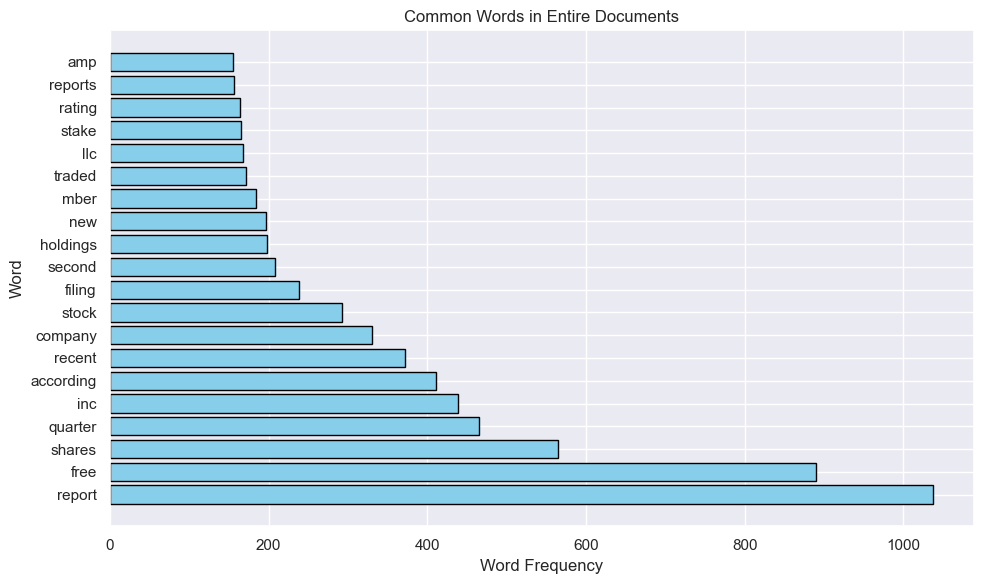

In [41]:
# Visualization after text preprocessing
#visualization for common words in entire documents
# Chart - 4 visualization code

# Combine all article content across categories
combined_content = ' '.join(df_cleaned['brief_review'])

#convert the whole content in lowercase
combined_content = combined_content.lower()

# Tokenize the combined content
tokens = combined_content.split()

# Filter out stopwords and non-alphanumeric words
filtered_tokens = [word for word in tokens if word.isalpha() and word not in STOPWORDS]

# Create a Counter to count word frequencies
word_counter = Counter(filtered_tokens)

# Choose the number of most common words to visualize
num_common_words = 20
common_words = word_counter.most_common(num_common_words)

# Create a bar plot for common words
plt.figure(figsize=(10, 6))
plt.barh([word[0] for word in common_words], [count[1] for count in common_words], color='skyblue', edgecolor='black')
plt.title('Common Words in Entire Documents')
plt.xlabel('Word Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Display the plot
plt.show()

## 7. Text Normalization (Stemming, Lemmatization)

### 7.1 Stemming

In [42]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to perform stemming on text
def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply the stem_text function to the "tokenized_content" column
df_cleaned['stemmed_content'] = df_cleaned['tokenized_content'].apply(stem_text)

/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/3778423393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['stemmed_content'] = df_cleaned['tokenized_content'].apply(stem_text)


### 7.2 Lemmatization

In [43]:
nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the lemmatize_text function to the "tokenized_content" column
df_cleaned['lemmatized_content'] = df_cleaned['tokenized_content'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /Users/binitkc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/zl/sz8m1sq17kg0nb_7_b93gkn40000gn/T/ipykernel_98192/522873989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['lemmatized_content'] = df_cleaned['tokenized_content'].apply(lemmatize_text)


In [44]:
df_cleaned.head()

,unique_identifier,brief_review,category,tokenized_content,stemmed_content,lemmatized_content
54879,123984,bench nifty started session positive note mber...,Finance,"[bench, nifty, started, session, positive, not...","[bench, nifti, start, session, posit, note, mb...","[bench, nifty, started, session, positive, not..."
11877,112963,reported standalone quarterly numbers dabur in...,Finance,"[reported, standalone, quarterly, numbers, dab...","[report, standalon, quarterli, number, dabur, ...","[reported, standalone, quarterly, number, dabu..."
75755,302235,andra fonden raised stake carmax inc nysekmx f...,Finance,"[andra, fonden, raised, stake, carmax, inc, ny...","[andra, fonden, rais, stake, carmax, inc, nyse...","[andra, fonden, raised, stake, carmax, inc, ny..."
83139,367656,shares manappuram finance jumped wednesday hit...,Finance,"[shares, manappuram, finance, jumped, wednesda...","[share, manappuram, financ, jump, wednesday, h...","[share, manappuram, finance, jumped, wednesday..."
54935,124065,hbs faculty comprises scholars practitioners b...,Finance,"[hbs, faculty, comprises, scholars, practition...","[hb, faculti, compris, scholar, practition, br...","[hb, faculty, comprises, scholar, practitioner..."


In [45]:
df_cleaned.stemmed_content.iloc[0]

['bench',
 'nifti',
 'start',
 'session',
 'posit',
 'note',
 'mber',
 'soon',
 'top',
 'back',
 'upbeat',
 'global',
 'cue',
 'global',
 'et',
 'factor',
 'expect',
 'feder']

In [46]:
df_cleaned.lemmatized_content.iloc[0]


['bench',
 'nifty',
 'started',
 'session',
 'positive',
 'note',
 'mber',
 'soon',
 'topping',
 'backed',
 'upbeat',
 'global',
 'cue',
 'global',
 'ets',
 'factoring',
 'expectation',
 'federal']

In [47]:
# we can see that the lemmatized contents are better than the stemmed contents. 

## 8. POS Tagging

In [48]:
# # Download required NLTK packages
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')  # Ensure the punkt package is also downloaded

# # Function to perform POS tagging on text
# def pos_tagging(tokens):
#     pos_tags = pos_tag(tokens)
#     return pos_tags

# # Assuming df_cleaned['lemmatized_content'] contains tokenized text
# df_cleaned['pos_tags'] = df_cleaned['lemmatized_content'].apply(pos_tagging)


## 9. Text Vectorization

In [49]:

# Vectorizing Text

# Convert the list of lemmatized tokens into strings
lemmatized_text = [' '.join(tokens) for tokens in df_cleaned['lemmatized_content']]

# Initialize a CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the lemmatized text data
tfidf_matrix = vectorizer.fit_transform(lemmatized_text)

print('\n')
print('\n')
# Display the shape of the resulting matrix
print("Shape of the vectorized matrix:", tfidf_matrix.shape)
     





Shape of the vectorized matrix: (1970, 3017)


# ML model Implementation -LDA Model

In [64]:
# ML Model - 1 Implementation - before hyper parameter tuning

# Convert the list of lemmatized tokens into a list of lists
lemmatized_text = [tokens for tokens in df_cleaned['lemmatized_content']]

# Create a dictionary of terms with term frequency filtering
dictionary = corpora.Dictionary(lemmatized_text)
dictionary.filter_extremes(no_below=3, no_above=0.85)

# Fit the Algorithm

# Create a Gensim corpus
corpus_gensim = [dictionary.doc2bow(text) for text in lemmatized_text]

# Build LDA model
num_topics = 3
lda_model = LdaModel(corpus_gensim, num_topics=num_topics, id2word=dictionary, passes=30, random_state= 40)

print('\n')
print('\n')
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=lemmatized_text, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print coherence score
print(f"Coherence Score: {coherence_score:.4f}")


# Print topics and associated words
for topic_id, topic_words in lda_model.print_topics():
    print('\n')
    print(f"Topic {topic_id}: {topic_words}")





Coherence Score: 0.5692


Topic 0: 0.069*"report" + 0.042*"free" + 0.038*"share" + 0.036*"stock" + 0.032*"get" + 0.020*"rating" + 0.019*"traded" + 0.016*"research" + 0.015*"price" + 0.012*"issued"


Topic 1: 0.009*"new" + 0.008*"november" + 0.007*"globe" + 0.007*"newswire" + 0.007*"gaza" + 0.006*"finance" + 0.006*"mber" + 0.006*"company" + 0.006*"health" + 0.006*"technology"


Topic 2: 0.061*"report" + 0.055*"free" + 0.049*"quarter" + 0.043*"according" + 0.039*"recent" + 0.035*"inc" + 0.030*"share" + 0.025*"company" + 0.025*"filing" + 0.022*"second"


In [51]:
# # import matplotlib.pyplot as plt
# # from gensim.models import CoherenceModel

# # List to hold coherence scores for different passes
# coherence_scores = []
# passes_range = range(1, 31)  # You can adjust the range

# for num_passes in passes_range:
#     lda_model = LdaModel(corpus=corpus_gensim, num_topics=num_topics, id2word=dictionary, passes=num_passes, random_state=40)
#     coherence_model = CoherenceModel(model=lda_model, texts=lemmatized_text, dictionary=dictionary, coherence='c_v')
#     coherence_scores.append(coherence_model.get_coherence())




In [52]:
# # Plot the coherence scores for different no. of passes 
# plt.figure(figsize=(10, 6))
# plt.plot(passes_range, coherence_scores, marker='o', color = 'black')
# plt.xlabel("Number of Passes")
# plt.ylabel("Coherence Score")
# plt.title("Coherence Score vs. Number of Passes")
# plt.grid(True)
# plt.show()

In [53]:
# #Hyperparameter tuning for number of topics. 
# # Define a range for the number of topics
# topics_range = range(1, 21)  # Adjust the range as needed
# coherence_scores_topics = []

# # Loop through each number of topics
# for num_topics in topics_range:
#     lda_model = LdaModel(corpus=corpus_gensim, num_topics=num_topics, id2word=dictionary, passes=20, random_state=40)
#     coherence_model = CoherenceModel(model=lda_model, texts=lemmatized_text, dictionary=dictionary, coherence='c_v')
#     coherence_scores_topics.append(coherence_model.get_coherence())


In [54]:
# # Plot the coherence scores for different no. of topics  
# plt.figure(figsize=(10, 6))
# plt.plot(topics_range, coherence_scores_topics, marker='o', color = "black")
# plt.xlabel("Number of Topics")
# plt.ylabel("Coherence Score")
# plt.title("Coherence Score vs. Number of Topics")
# plt.grid(True)
# plt.show()

In [55]:
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import ParameterGrid
# from gensim.models import LdaModel
# from gensim.models.coherencemodel import CoherenceModel

# Define a grid of hyperparameters to search over
param_grid = {
    'num_topics': [3, 4, 5, 6, 7, 8, 9, 10],
    'passes': [10,15,20,25, 30]
}

best_coherence_score = -1
best_lda_model = None
scores = []  # To store coherence scores
topics = []  # To store number of topics
passes_list = []  # To store passes for each model

# Perform grid search
for params in ParameterGrid(param_grid):
    lda_model = LdaModel(corpus=corpus_gensim, id2word=dictionary, **params)
    coherence_model = CoherenceModel(model=lda_model, texts=lemmatized_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Track best model
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_lda_model = lda_model
    
    # Collect data for plotting
    scores.append(coherence_score)
    topics.append(params['num_topics'])
    passes_list.append(params['passes'])


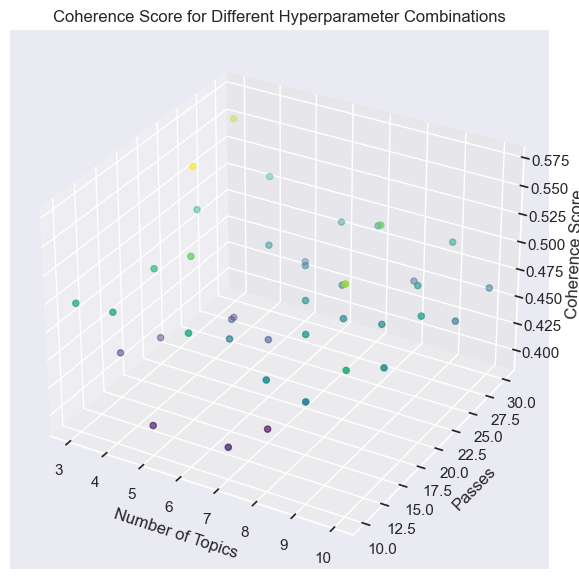

Best Hyperparameters: LdaModel<num_terms=1894, num_topics=4, decay=0.5, chunksize=2000>
Best Coherence Score: 0.5711

Topic 0: 0.011*"november" + 0.009*"new" + 0.009*"globe" + 0.009*"newswire" + 0.008*"gaza" + 0.008*"health" + 0.008*"mber" + 0.006*"ceo" + 0.006*"one" + 0.006*"technology"

Topic 1: 0.031*"traded" + 0.027*"stock" + 0.027*"share" + 0.027*"get" + 0.026*"report" + 0.024*"free" + 0.019*"trading" + 0.016*"per" + 0.015*"last" + 0.014*"high"

Topic 2: 0.087*"report" + 0.051*"free" + 0.033*"get" + 0.031*"share" + 0.027*"rating" + 0.026*"stock" + 0.019*"research" + 0.017*"mber" + 0.016*"company" + 0.016*"issued"

Topic 3: 0.053*"report" + 0.050*"quarter" + 0.047*"free" + 0.044*"according" + 0.042*"recent" + 0.036*"inc" + 0.030*"share" + 0.027*"filing" + 0.024*"company" + 0.023*"second"


In [56]:
# Plot coherence score in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(topics, passes_list, scores, c=scores, cmap='viridis', marker='o')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Passes')
ax.set_zlabel('Coherence Score')
ax.set_title("Coherence Score for Different Hyperparameter Combinations")
plt.show()

# Print best hyperparameters and coherence score
print("Best Hyperparameters:", best_lda_model)
print(f"Best Coherence Score: {best_coherence_score:.4f}")

# Print topics and associated words for the best model
for topic_id, topic_words in best_lda_model.print_topics():
    print(f"\nTopic {topic_id}: {topic_words}")

In [57]:
lda_model = best_lda_model
num_topics = 3

In [65]:
# Visualizing evaluation Metric Score chart

# Visualize the topics
vis_data = gensimvis.prepare(lda_model, corpus_gensim, dictionary)
pyLDAvis.display(vis_data)

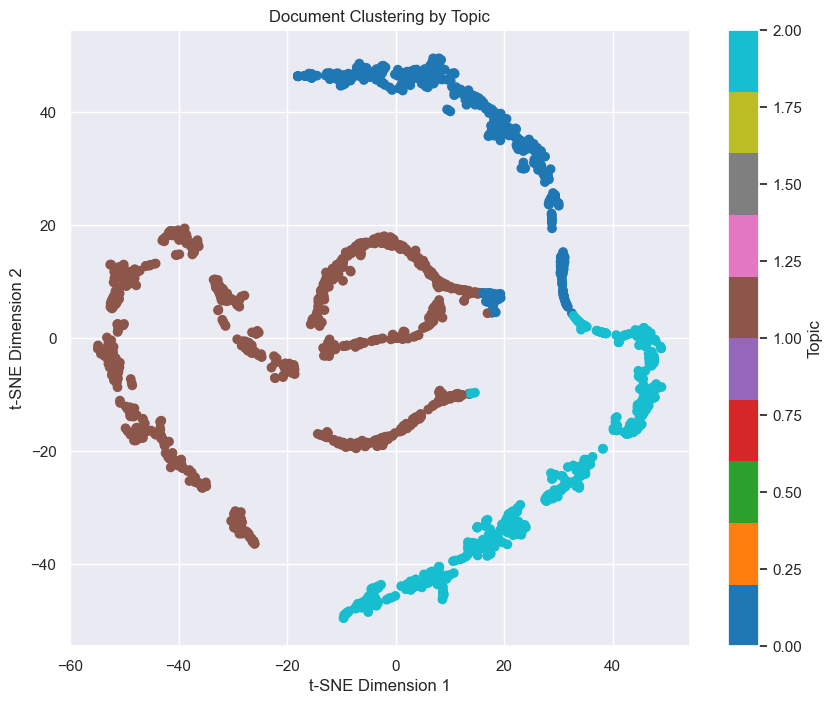

In [66]:
# import numpy as np
from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# Generate the document-topic distribution for each document
# Each element in `doc_topics` is a list of (topic_id, probability) tuples for a document
doc_topics = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus_gensim]

# Create the document-topic matrix where each row represents a document, and each column represents a topic's probability
doc_topic_matrix = np.array([[topic[1] for topic in doc] for doc in doc_topics])

# Apply t-SNE to document-topic matrix to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
doc_topic_tsne = tsne.fit_transform(doc_topic_matrix)

# Plot the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(doc_topic_tsne[:, 0], doc_topic_tsne[:, 1], c=np.argmax(doc_topic_matrix, axis=1), cmap="tab10")
plt.colorbar(label='Topic')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Document Clustering by Topic")
plt.show()


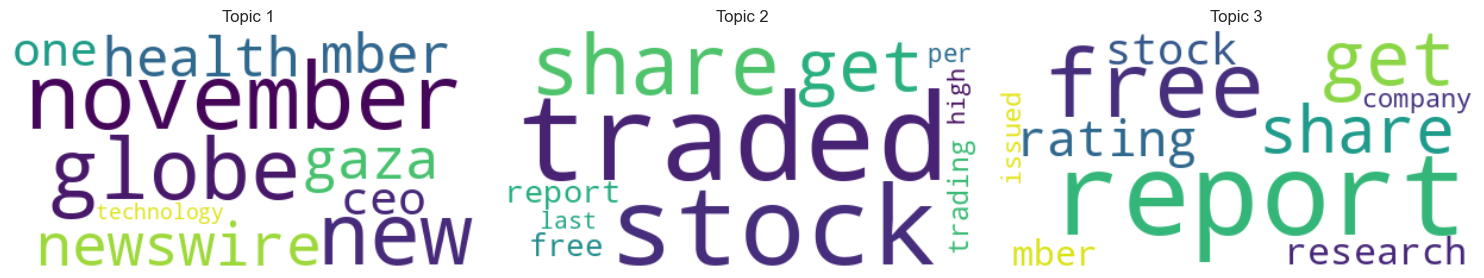

In [60]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Function to plot word clouds for each topic
def plot_word_clouds(lda_model, num_topics, num_words=10, rows=1, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D grid to iterate over

    for topic_id in range(num_topics):
        # Get the top words for the current topic
        words = dict(lda_model.show_topic(topic_id, topn=num_words))
        
        # Generate word cloud
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(words)
        
        # Plot word cloud in the subplot
        axes[topic_id].imshow(wordcloud, interpolation='bilinear')
        axes[topic_id].axis('off')
        axes[topic_id].set_title(f"Topic {topic_id + 1}")
    
    # Hide any remaining empty subplots
    for i in range(topic_id + 1, rows * cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot word clouds
plot_word_clouds(best_lda_model, num_topics)  


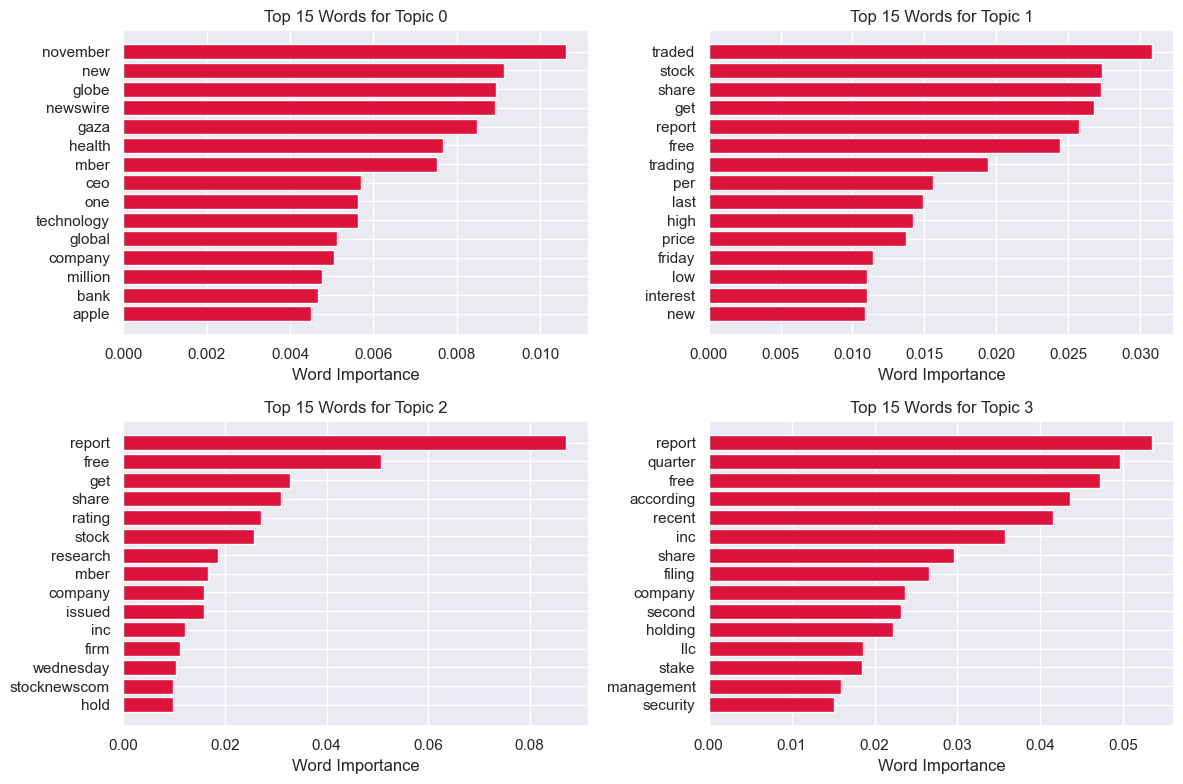

In [61]:
# import matplotlib.pyplot as plt

# Parameters
num_top_words = 15  # Number of top words to display for each topic
num_topics = lda_model.num_topics  # Total number of topics in the LDA model

# Define grid size for plotting (adjust based on the number of topics)
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Plot the top words for each topic
for topic_idx in range(num_topics):
    row = topic_idx // num_cols
    col = topic_idx % num_cols

    # Get the top words and weights for the current topic
    top_words = lda_model.show_topic(topic_idx, topn=num_top_words)
    words, weights = zip(*top_words)

    # Plot horizontal bar chart for the topic
    axes[row, col].barh(words, weights, color='crimson')
    axes[row, col].set_title(f"Top {num_top_words} Words for Topic {topic_idx}")
    axes[row, col].set_xlabel("Word Importance")
    axes[row, col].invert_yaxis()  # Show the most important word at the top

# Remove empty subplots if the grid is larger than the number of topics
for i in range(num_topics, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [62]:
# # Calculate document lengths
# doc_lens = [len(d) for d in df_cleaned['lemmatized_content']]

# # Plot with larger figure size and higher resolution
# plt.figure(figsize=(20, 10), dpi=200)  # Adjust as needed
# plt.hist(doc_lens, bins=100, color='navy')

# # Add statistics as text annotations on the left side of the plot
# plt.text(10, max(plt.gca().get_ylim()) * 0.9, f"Mean   : {round(np.mean(doc_lens))}", fontsize=12)
# plt.text(10, max(plt.gca().get_ylim()) * 0.85, f"Median : {round(np.median(doc_lens))}", fontsize=12)
# plt.text(10, max(plt.gca().get_ylim()) * 0.8, f"Stdev   : {round(np.std(doc_lens))}", fontsize=12)
# plt.text(10, max(plt.gca().get_ylim()) * 0.75, f"1%ile    : {round(np.quantile(doc_lens, q=0.01))}", fontsize=12)
# plt.text(10, max(plt.gca().get_ylim()) * 0.7, f"99%ile  : {round(np.quantile(doc_lens, q=0.99))}", fontsize=12)

# # Configure plot settings
# plt.gca().set(xlim=(0, max(doc_lens)), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.xticks(np.linspace(0, max(doc_lens), 10))
# plt.title('Distribution of Document Word Counts', fontdict={'size': 24})
# plt.show()


# ML model Implementation -LSA Model

In [63]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# # from gensim.models import CoherenceModel
# from gensim.corpora.dictionary import Dictionary
# # import numpy as np

# # Step 1: Prepare text data
# # Assuming 'lemmatized_text' is a list of lists of lemmatized tokens as per your previous code
# lemmatized_text = [tokens for tokens in df_cleaned['lemmatized_content']]

# Step 2: Create TF-IDF matrix
# tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# # Step 3: Train LSA model using TruncatedSVD
# num_topics = 5
# lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
# lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# # Step 4: Extract top words for each topic
# def get_lsa_topics(model, vectorizer, n_words=10):
#     topics = []
#     for idx, topic in enumerate(model.components_):
#         top_words_indices = topic.argsort()[:-n_words - 1:-1]
#         top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
#         topics.append(top_words)
#     return topics

# topics = get_lsa_topics(lsa_model, tfidf_vectorizer)

# # Step 5: Create a Gensim dictionary and corpus for coherence calculation
# dictionary = Dictionary(lemmatized_text)
# corpus = [dictionary.doc2bow(text) for text in lemmatized_text]

# # Step 6: Calculate the coherence score
# coherence_model = CoherenceModel(topics=topics, texts=lemmatized_text, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model.get_coherence()

# # Print coherence score
# print(f"Coherence Score: {coherence_score:.4f}")

# # Display the topics and their associated words
# for i, topic in enumerate(topics):
#     print(f"Topic {i}: {', '.join(topic)}")
